In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import rank_features
from tailor.clustering import distance
from tailor.data import group_by
from tailor.visualization import plot_article_history, plot_feature_history

In [3]:
df = tailor.load_data()

In [4]:
df.head()

,article_id,season,brand,color,Abteilung,WHG,WUG,month,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
0,900001,Spring,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,Mar,0,59.95,58.350000,1.600000,0.0,3.000000,1499.0,0.416945,176.350000
1,900001,Spring,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,Apr,0,59.95,59.950000,0.000000,0.0,5.000000,1499.0,1.334223,299.750000
2,900001,Spring,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,Apr,1,59.95,59.755714,0.194286,0.0,5.571429,1499.0,3.097303,333.230000
3,900001,Spring,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,Apr,2,59.95,58.950000,1.000000,0.0,5.333333,1499.0,5.303536,315.233333
4,900001,Spring,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,Apr,3,59.95,58.785000,1.165000,0.0,6.750000,1499.0,7.204803,399.172500


In [5]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season']

r_feats = rank_features(df, distance.euclidean, feats, 'article_count')
print(r_feats)

Abteilung    1.098196
brand        0.256130
WHG          0.250199
season       0.199529
WUG          0.132761
color        0.059410
dtype: float64


In [6]:
f = feat.index[5]
print(f)

NameError: name 'feat' is not defined

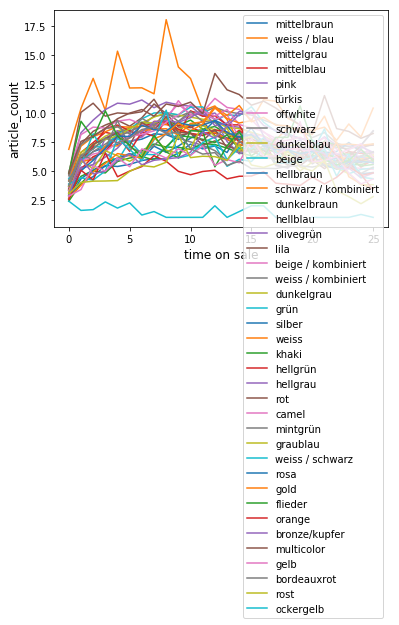

In [49]:
plot_feature_history(df, f, 'article_count');

In [50]:
df_f = group_by.feature(df, f)
A5 = df_f.loc[df_f.Abteilung == 'Abteilung007'].set_index('time_on_sale')
A6 = df_f.loc[df_f.Abteilung == 'Abteilung006'].set_index('time_on_sale')
distance.euclidean(A5['article_count'],A6['article_count'])

AttributeError: 'DataFrame' object has no attribute 'Abteilung'

In [51]:
chars = df_f[f].unique()
dists = np.empty((len(chars), len(chars)))
l = []
                 
for i, x in enumerate(chars):
    x_rev = df_f.loc[df_f[f] == x].set_index('time_on_sale')
    
    for k, y in enumerate(chars):
        if y <= x:
            continue
            
        y_rev = df_f.loc[df_f[f] == y].set_index('time_on_sale')
        d = distance.euclidean(x_rev['article_count'], y_rev['article_count'])
        dists[i][k] = d
        l.append((d,x,y))

df_d = pd.DataFrame(l, columns=['distance', 'charA', 'charB'])
df_d = df_d.loc[df_d.charA != df_d.charB].sort_values(by='distance')
threshhold = df_d.distance.mean() / 2
df_t = df_d.loc[df_d.distance < threshhold]


In [52]:
df_t

,distance,charA,charB
330,0.286621,dunkelgrau,mittelgrau
39,0.308515,mittelblau,mittelgrau
44,0.381593,mittelblau,schwarz / kombiniert
331,0.399573,dunkelgrau,mittelblau
94,0.440224,dunkelblau,mittelgrau
32,0.441127,mittelgrau,rosa
337,0.448606,dunkelgrau,schwarz / kombiniert
13,0.449789,mittelbraun,rosa
352,0.458030,dunkelgrau,rosa
25,0.463037,mittelgrau,schwarz / kombiniert
